## Mini-Project-2

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, LSTM, Dropout
from keras.datasets import mnist

### Loading the MNIST Dataset:-

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [28]:
img_height, img_width = x_train.shape[1], x_train.shape[2]
x_train_reshaped = x_train.reshape(-1, img_height, img_width, 1)
x_test_reshaped = x_test.reshape(-1, img_height, img_width, 1)

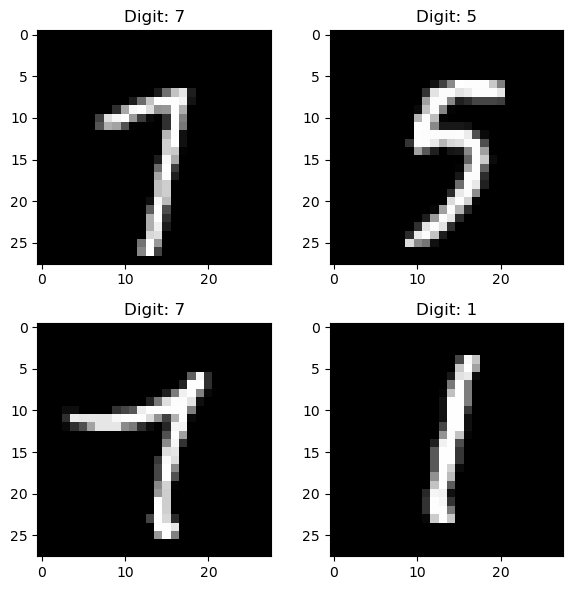

In [29]:
plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.imshow(x_train[42], cmap='gray')
plt.title("Digit: {}".format(y_train[42]))

plt.subplot(222)
plt.imshow(x_train[420], cmap='gray')
plt.title("Digit: {}".format(y_train[420]))

plt.subplot(223)
plt.imshow(x_train[4200], cmap='gray')
plt.title("Digit: {}".format(y_train[4200]))

plt.subplot(224)
plt.imshow(x_train[42000], cmap='gray')
plt.title("Digit: {}".format(y_train[42000]))
plt.tight_layout()
plt.show()

### A Basic Histogram on the MNIST Dataset:-

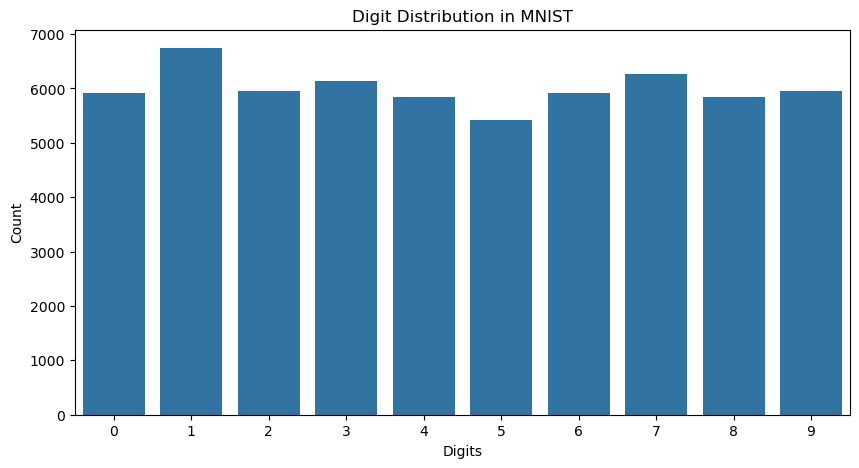

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_train)
plt.title("Digit Distribution in MNIST")
plt.xlabel("Digits")
plt.ylabel("Count")
plt.show()

### A 2-Layer Neural Network(to predict the digits):-

In [31]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8793 - loss: 0.4245 - val_accuracy: 0.9588 - val_loss: 0.1344
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9662 - loss: 0.1135 - val_accuracy: 0.9672 - val_loss: 0.1047
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9765 - loss: 0.0746 - val_accuracy: 0.9754 - val_loss: 0.0818
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9838 - loss: 0.0514 - val_accuracy: 0.9743 - val_loss: 0.0855
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9861 - loss: 0.0432 - val_accuracy: 0.9784 - val_loss: 0.0782


### A Convolutional Neural Network(to predict the digits):-

In [32]:
model_cnn = Sequential()
model_cnn.add(Input(shape=(28, 28, 1)))
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

model_cnn.fit(x_train_reshaped, y_train, epochs=5, validation_data=(x_test_reshaped, y_test))

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - accuracy: 0.8966 - loss: 0.3242 - val_accuracy: 0.9841 - val_loss: 0.0487
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9841 - loss: 0.0513 - val_accuracy: 0.9855 - val_loss: 0.0457
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9891 - loss: 0.0346 - val_accuracy: 0.9895 - val_loss: 0.0343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9925 - loss: 0.0241 - val_accuracy: 0.9884 - val_loss: 0.0355
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9883 - val_loss: 0.0387


### A Recurrent Neural Network(to predict the digits):-

In [33]:
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

model_rnn = Sequential()
model_rnn.add(Input(shape=(28,28)))
model_rnn.add(LSTM(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(10, activation='softmax'))

model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_rnn.summary()

model_rnn.fit(x_train_rnn, y_train, epochs=5, validation_data=(x_test_rnn, y_test))

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,290 (348.79 KB)

 Trainable params: 89,290 (348.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 108s 55ms/step - accuracy: 0.7267 - loss: 0.8018 - val_accuracy: 0.9590 - val_loss: 0.1391
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 57ms/step - accuracy: 0.9586 - loss: 0.1428 - val_accuracy: 0.9747 - val_loss: 0.0821
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 59ms/step - accuracy: 0.9722 - loss: 0.0994 - val_accuracy: 0.9743 - val_loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 125s 49ms/step - accuracy: 0.9787 - loss: 0.0762 - val_accuracy: 0.9831 - val_loss: 0.0561
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9812 - loss: 0.0641 - val_accuracy: 0.9822 - val_loss: 0.0656


### Plotting the AUC and ROC curves for each classification method:-

In [34]:
def plot_roc(model, x_test, y_test, title):
    y_prob = model.predict(x_test)
    y_true = label_binarize(y_test, classes=np.arange(10))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    print(f"\n AUC Scores for {title}:")
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = roc_auc_score(y_true[:, i], y_prob[:, i])
        print(f"Class {i}: AUC = {roc_auc[i]:.4f}")

    avg_auc = np.mean(list(roc_auc.values()))
    print(f" Average (macro) AUC = {avg_auc:.4f}")

    plt.figure(figsize=(10, 6))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {title}\nAverage AUC = {avg_auc:.4f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

 AUC Scores for 2-Layer Neural Network:
Class 0: AUC = 0.9999
Class 1: AUC = 0.9998
Class 2: AUC = 0.9998
Class 3: AUC = 0.9995
Class 4: AUC = 0.9997
Class 5: AUC = 0.9996
Class 6: AUC = 0.9995
Class 7: AUC = 0.9996
Class 8: AUC = 0.9993
Class 9: AUC = 0.9992
 Average (macro) AUC = 0.9996


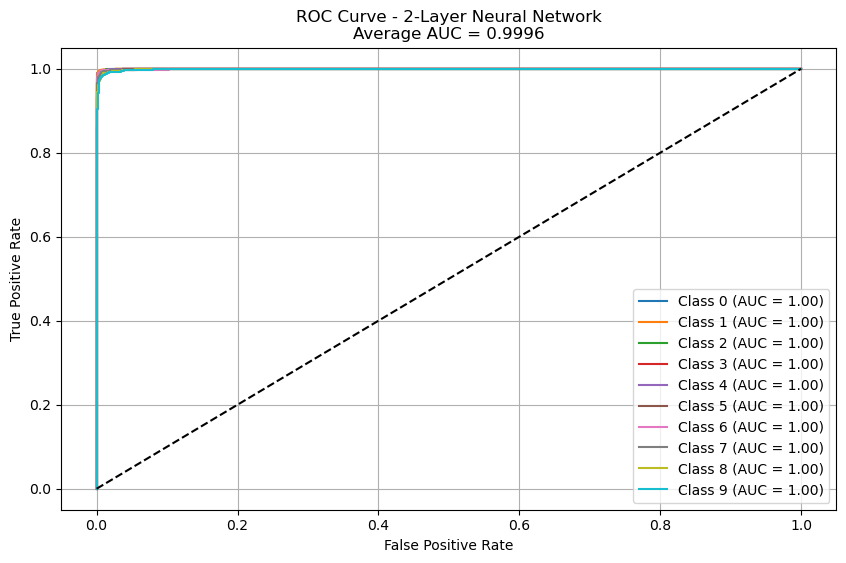

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

 AUC Scores for CNN:
Class 0: AUC = 1.0000
Class 1: AUC = 1.0000
Class 2: AUC = 0.9999
Class 3: AUC = 0.9999
Class 4: AUC = 1.0000
Class 5: AUC = 0.9998
Class 6: AUC = 0.9999
Class 7: AUC = 0.9999
Class 8: AUC = 0.9999
Class 9: AUC = 0.9999
 Average (macro) AUC = 0.9999


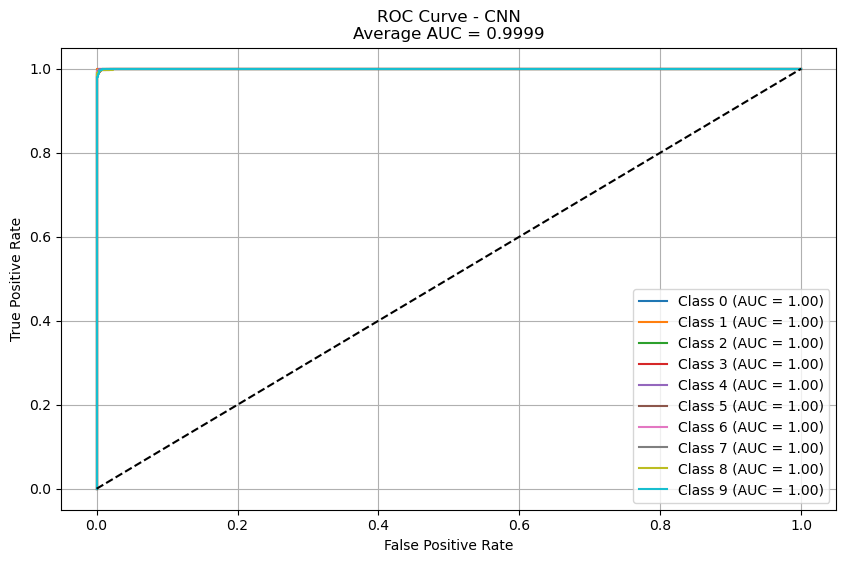

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step

 AUC Scores for RNN (LSTM):
Class 0: AUC = 0.9996
Class 1: AUC = 1.0000
Class 2: AUC = 0.9998
Class 3: AUC = 0.9989
Class 4: AUC = 0.9996
Class 5: AUC = 0.9997
Class 6: AUC = 0.9997
Class 7: AUC = 0.9995
Class 8: AUC = 0.9991
Class 9: AUC = 0.9997
 Average (macro) AUC = 0.9996


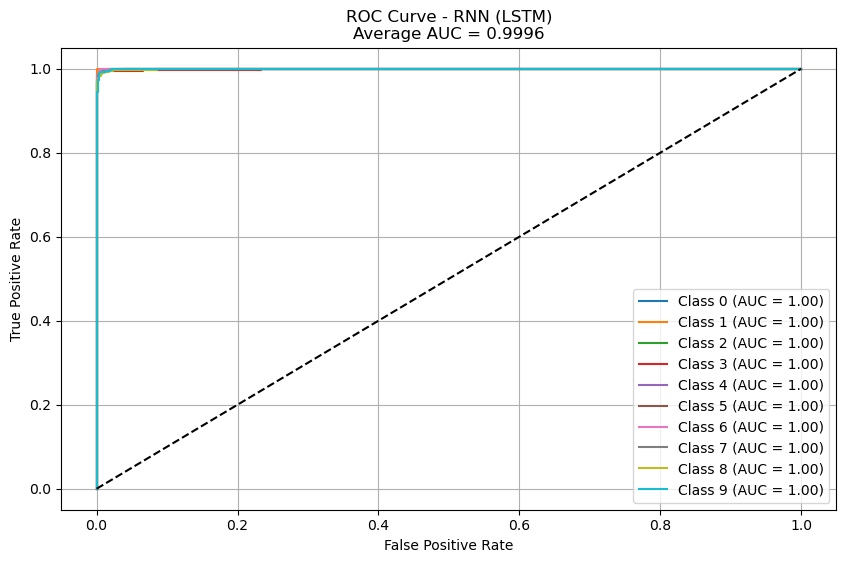

In [35]:
plot_roc(model, x_test, y_test, "2-Layer Neural Network")
plot_roc(model_cnn, x_test_reshaped, y_test, "CNN")
plot_roc(model_rnn, x_test_rnn, y_test, "RNN (LSTM)")